In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
runtimes = pd.read_csv("cmake-build-release/benchmark.csv")
runtimes["codecName"] = runtimes["name"].str[34:].str.split("_benchmark_").str[0]
runtimes["encodingDecoding"] = runtimes["name"].str[34:].str.split("_benchmark_").str[1].str.split("_get_with_").str[0]
runtimes["inputdata"] = runtimes["name"].str[34:].str.split("_benchmark_").str[1].str.split("_get_with_").str[1]
runtimes

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,codecName,encodingDecoding,inputdata
0,BenchmarkColumnCompressionFixture/maskedVByte_...,21948,31632.4,31542.4,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,encoding,small_numbers
1,BenchmarkColumnCompressionFixture/maskedVByte_...,73572,10077.3,10030.2,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,decoding,small_numbers
2,BenchmarkColumnCompressionFixture/maskedVByte_...,8523,81720.1,81447.5,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,encoding,sequential_numbers
3,BenchmarkColumnCompressionFixture/maskedVByte_...,5338,129471.0,128866.0,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,decoding,sequential_numbers
4,BenchmarkColumnCompressionFixture/maskedVByte_...,8405,81533.3,81135.2,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,encoding,huge_numbers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,BenchmarkColumnCompressionFixture/turboPFOR_be...,29691,23197.2,23125.7,ns,NaN,NaN,NaN,NaN,NaN,turboPFOR,decoding,sequential_numbers
220,BenchmarkColumnCompressionFixture/turboPFOR_be...,3174,221417.0,220619.0,ns,NaN,NaN,NaN,NaN,NaN,turboPFOR,encoding,huge_numbers
221,BenchmarkColumnCompressionFixture/turboPFOR_be...,32151,21905.7,21830.0,ns,NaN,NaN,NaN,NaN,NaN,turboPFOR,decoding,huge_numbers
222,BenchmarkColumnCompressionFixture/turboPFOR_be...,2827,247479.0,246304.0,ns,NaN,NaN,NaN,NaN,NaN,turboPFOR,encoding,random_walk


In [3]:
bpi = pd.read_csv("cmake-build-release/bits_per_int.csv")
bpi["codecName"] = bpi["name"]
bpi = bpi[bpi["codecName"] != "oroch_integerArray"] # todo implement this one
bpi

,name,dataName,bitsPerInt,codecName
0,maskedVByte,small_numbers,8.00000,maskedVByte
1,maskedVByte,sequential_numbers,32.00000,maskedVByte
2,maskedVByte,huge_numbers,24.00000,maskedVByte
3,maskedVByte,random_walk,32.00000,maskedVByte
4,maskedVByteDelta,small_numbers,16.00000,maskedVByteDelta
...,...,...,...,...
107,sdsl_lite_dac_vector,random_walk,36.17590,sdsl_lite_dac_vector
108,turboPFOR,small_numbers,2.06252,turboPFOR
109,turboPFOR,sequential_numbers,28.06250,turboPFOR
110,turboPFOR,huge_numbers,21.06250,turboPFOR


In [4]:
decoding_runtimes = runtimes[runtimes['encodingDecoding'] == "decoding"]
decoding_runtimes = decoding_runtimes[decoding_runtimes["codecName"] != "oroch_integerArray"]
decoding_runtimes

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,codecName,encodingDecoding,inputdata
1,BenchmarkColumnCompressionFixture/maskedVByte_...,73572,10077.3,10030.2,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,decoding,small_numbers
3,BenchmarkColumnCompressionFixture/maskedVByte_...,5338,129471.0,128866.0,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,decoding,sequential_numbers
5,BenchmarkColumnCompressionFixture/maskedVByte_...,9861,69758.6,69544.8,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,decoding,huge_numbers
7,BenchmarkColumnCompressionFixture/maskedVByte_...,5505,127524.0,127086.0,ns,NaN,NaN,NaN,NaN,NaN,maskedVByte,decoding,random_walk
9,BenchmarkColumnCompressionFixture/maskedVByteD...,4355,159757.0,157365.0,ns,NaN,NaN,NaN,NaN,NaN,maskedVByteDelta,decoding,small_numbers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BenchmarkColumnCompressionFixture/sdsl_lite_da...,184,3868980.0,3853990.0,ns,NaN,NaN,NaN,NaN,NaN,sdsl_lite_dac_vector,decoding,random_walk
217,BenchmarkColumnCompressionFixture/turboPFOR_be...,39393,17790.7,17734.6,ns,NaN,NaN,NaN,NaN,NaN,turboPFOR,decoding,small_numbers
219,BenchmarkColumnCompressionFixture/turboPFOR_be...,29691,23197.2,23125.7,ns,NaN,NaN,NaN,NaN,NaN,turboPFOR,decoding,sequential_numbers
221,BenchmarkColumnCompressionFixture/turboPFOR_be...,32151,21905.7,21830.0,ns,NaN,NaN,NaN,NaN,NaN,turboPFOR,decoding,huge_numbers


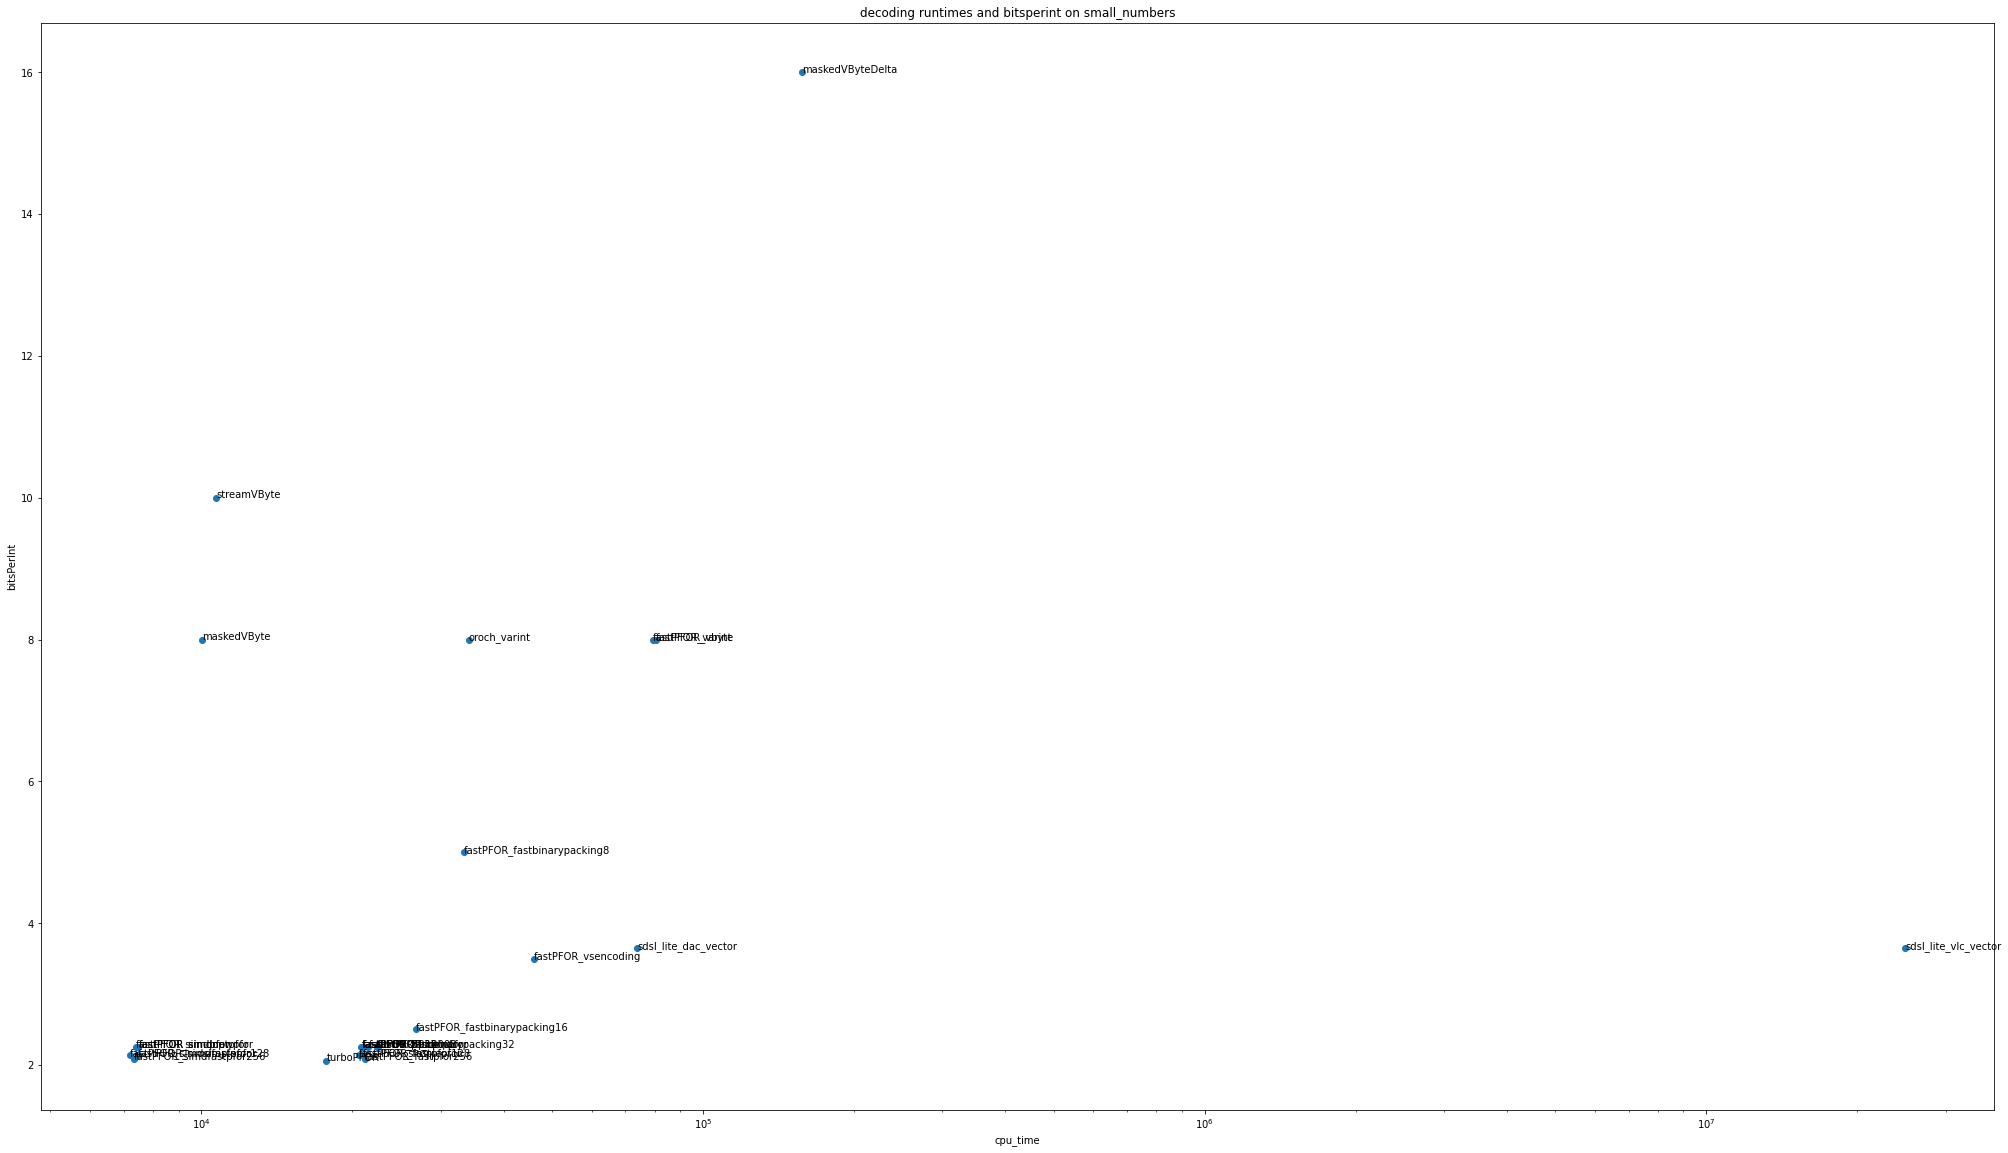

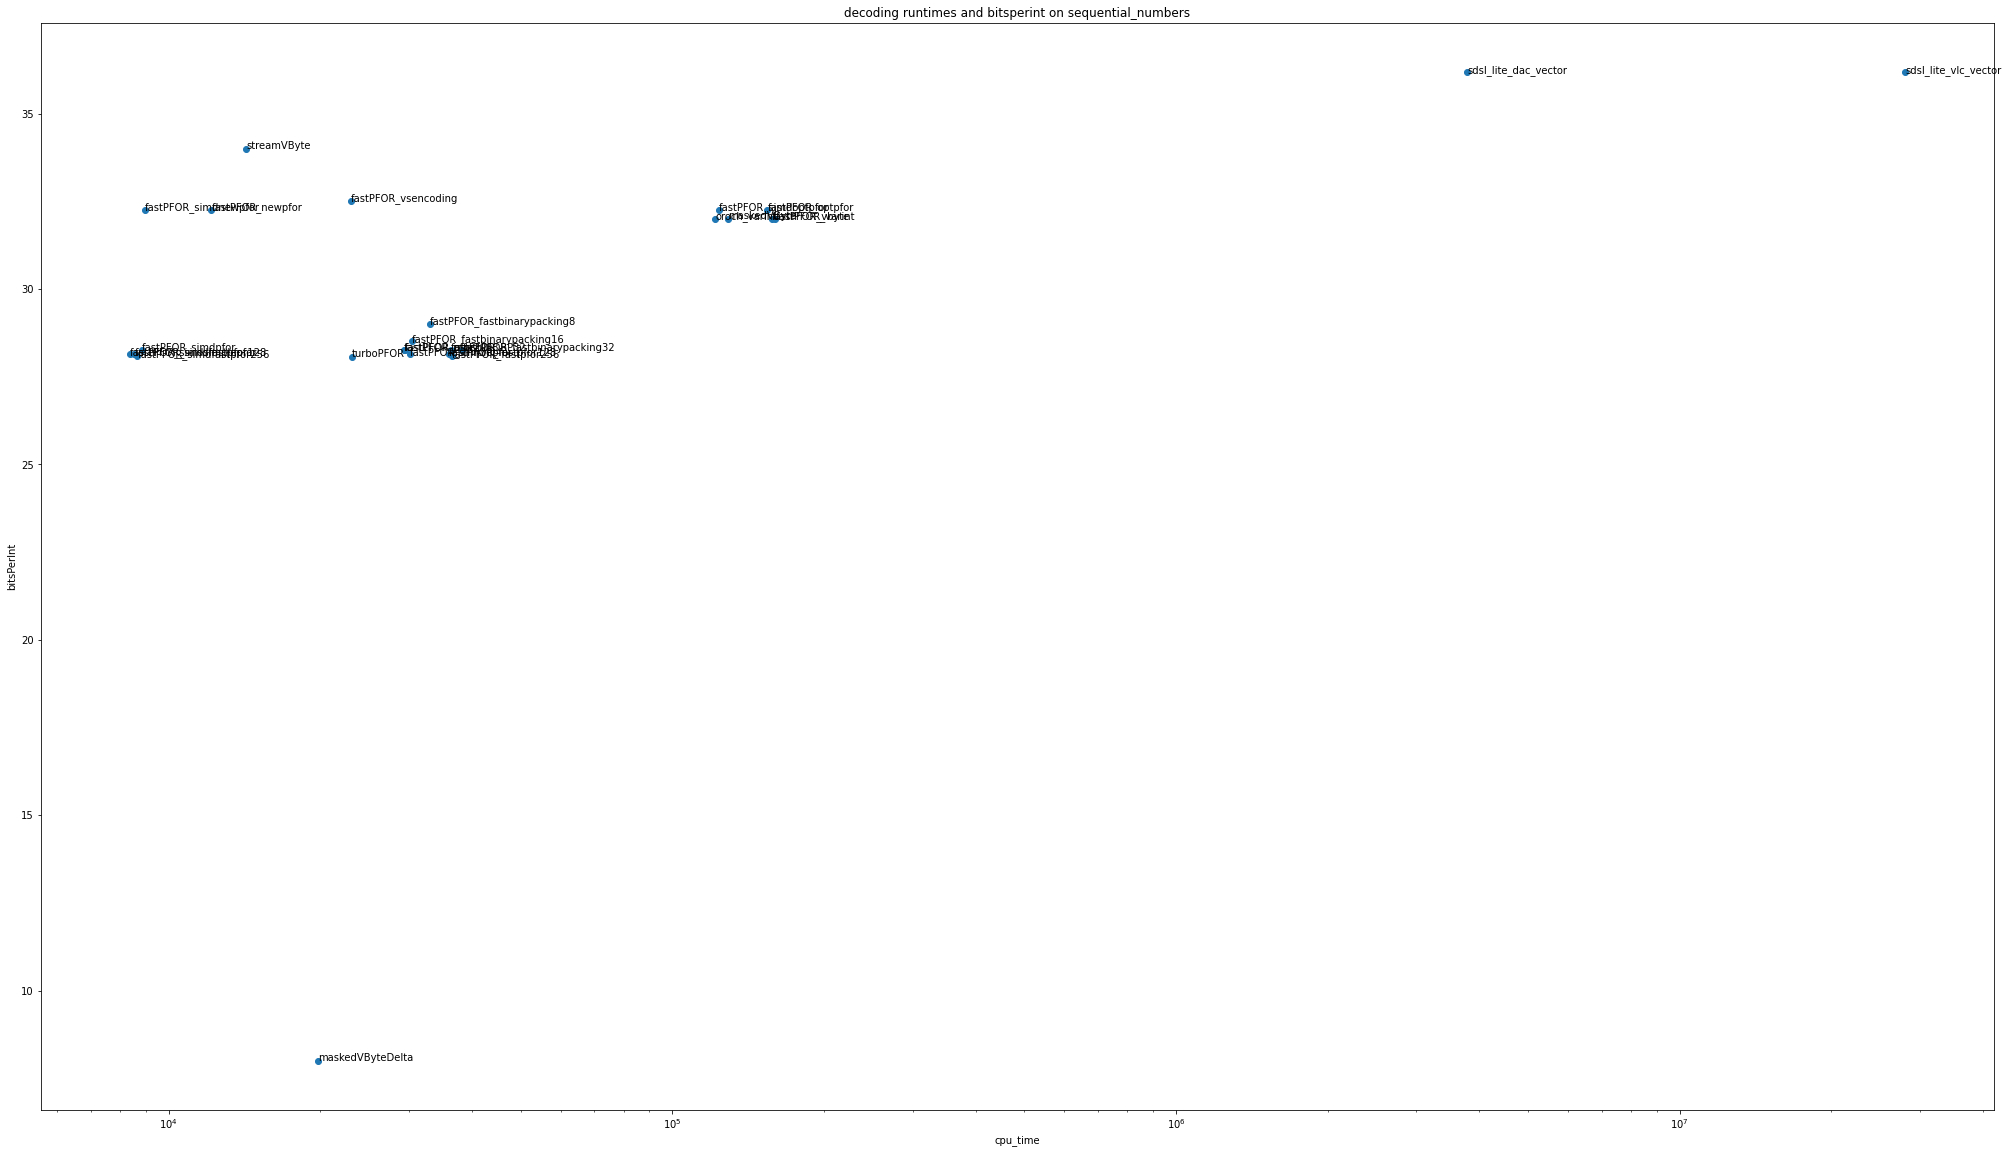

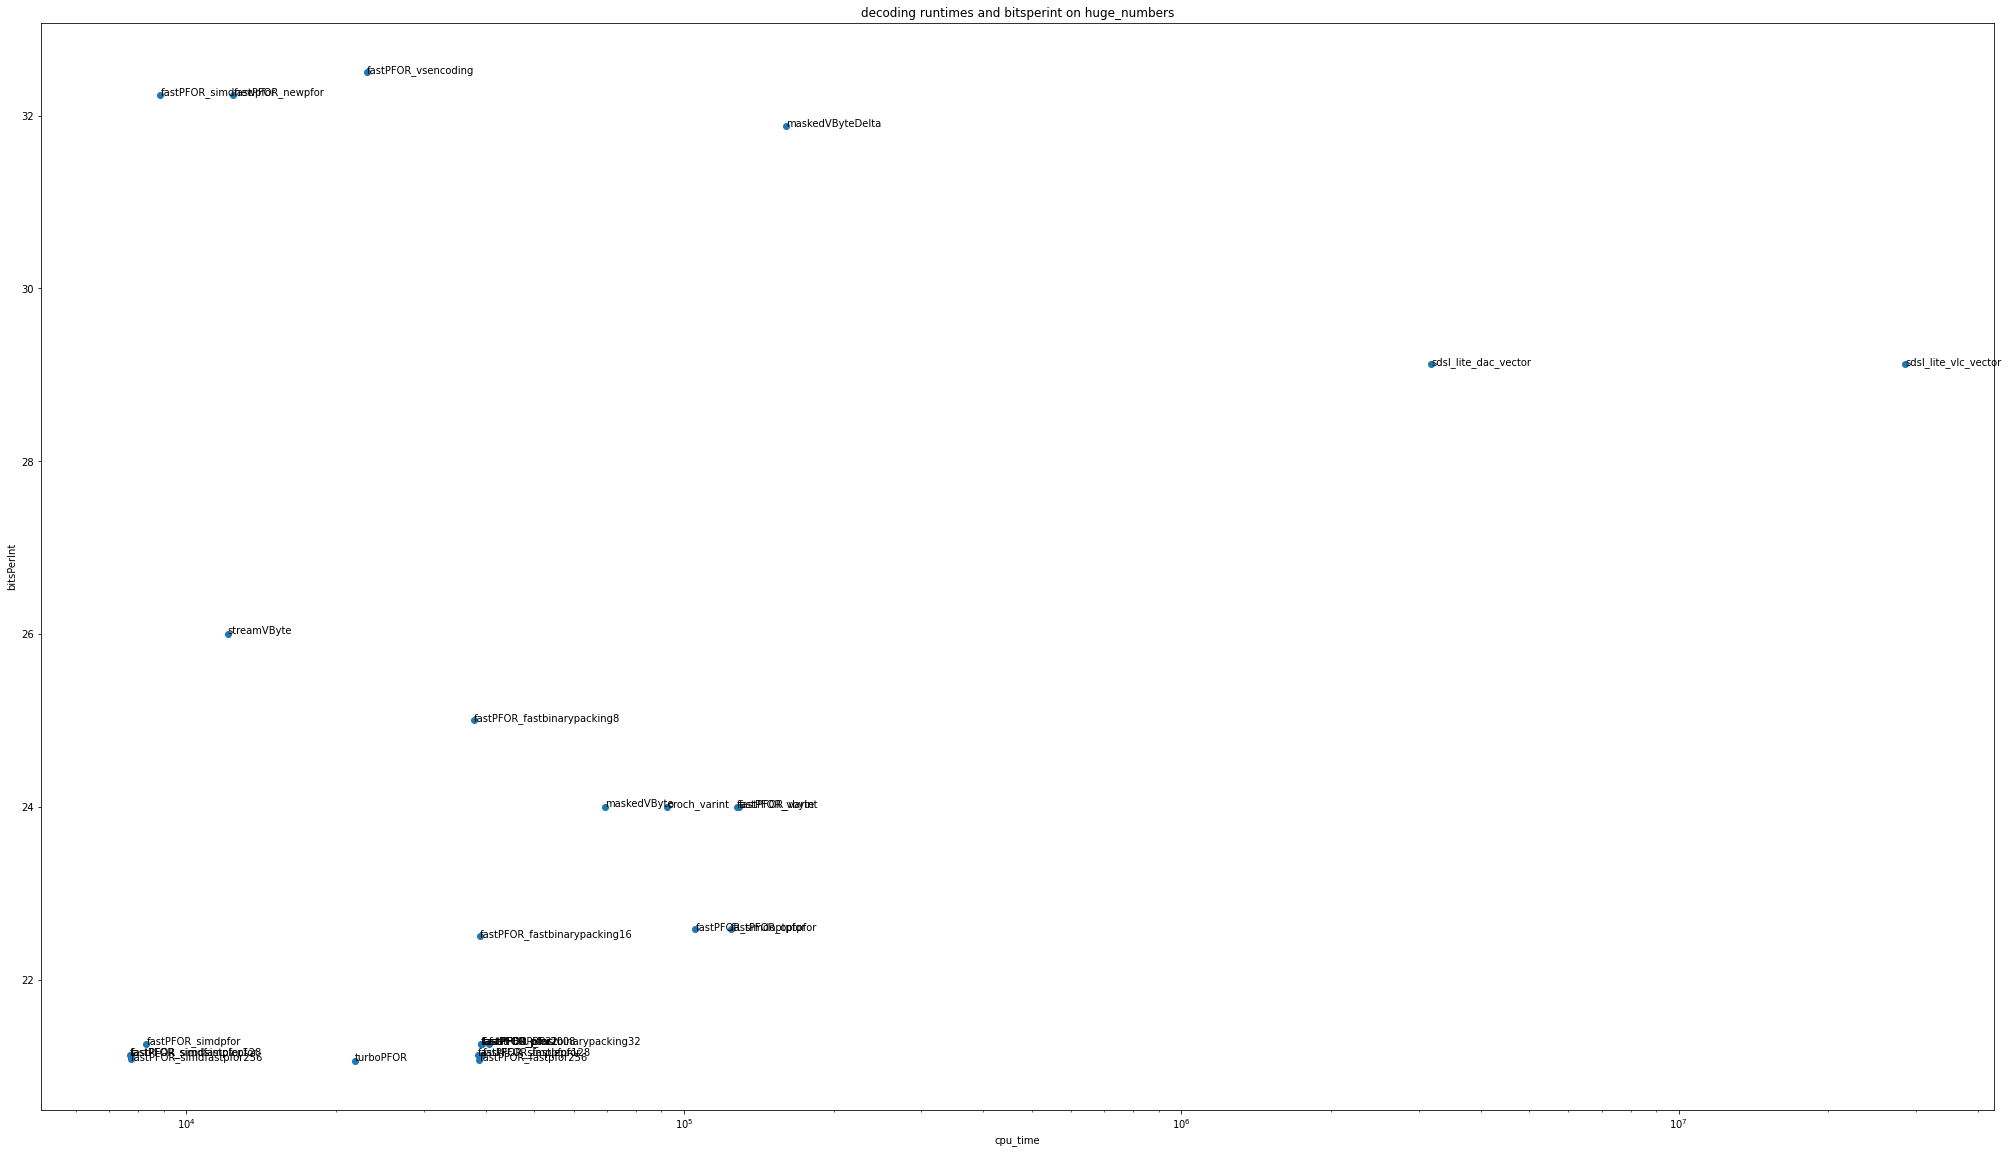

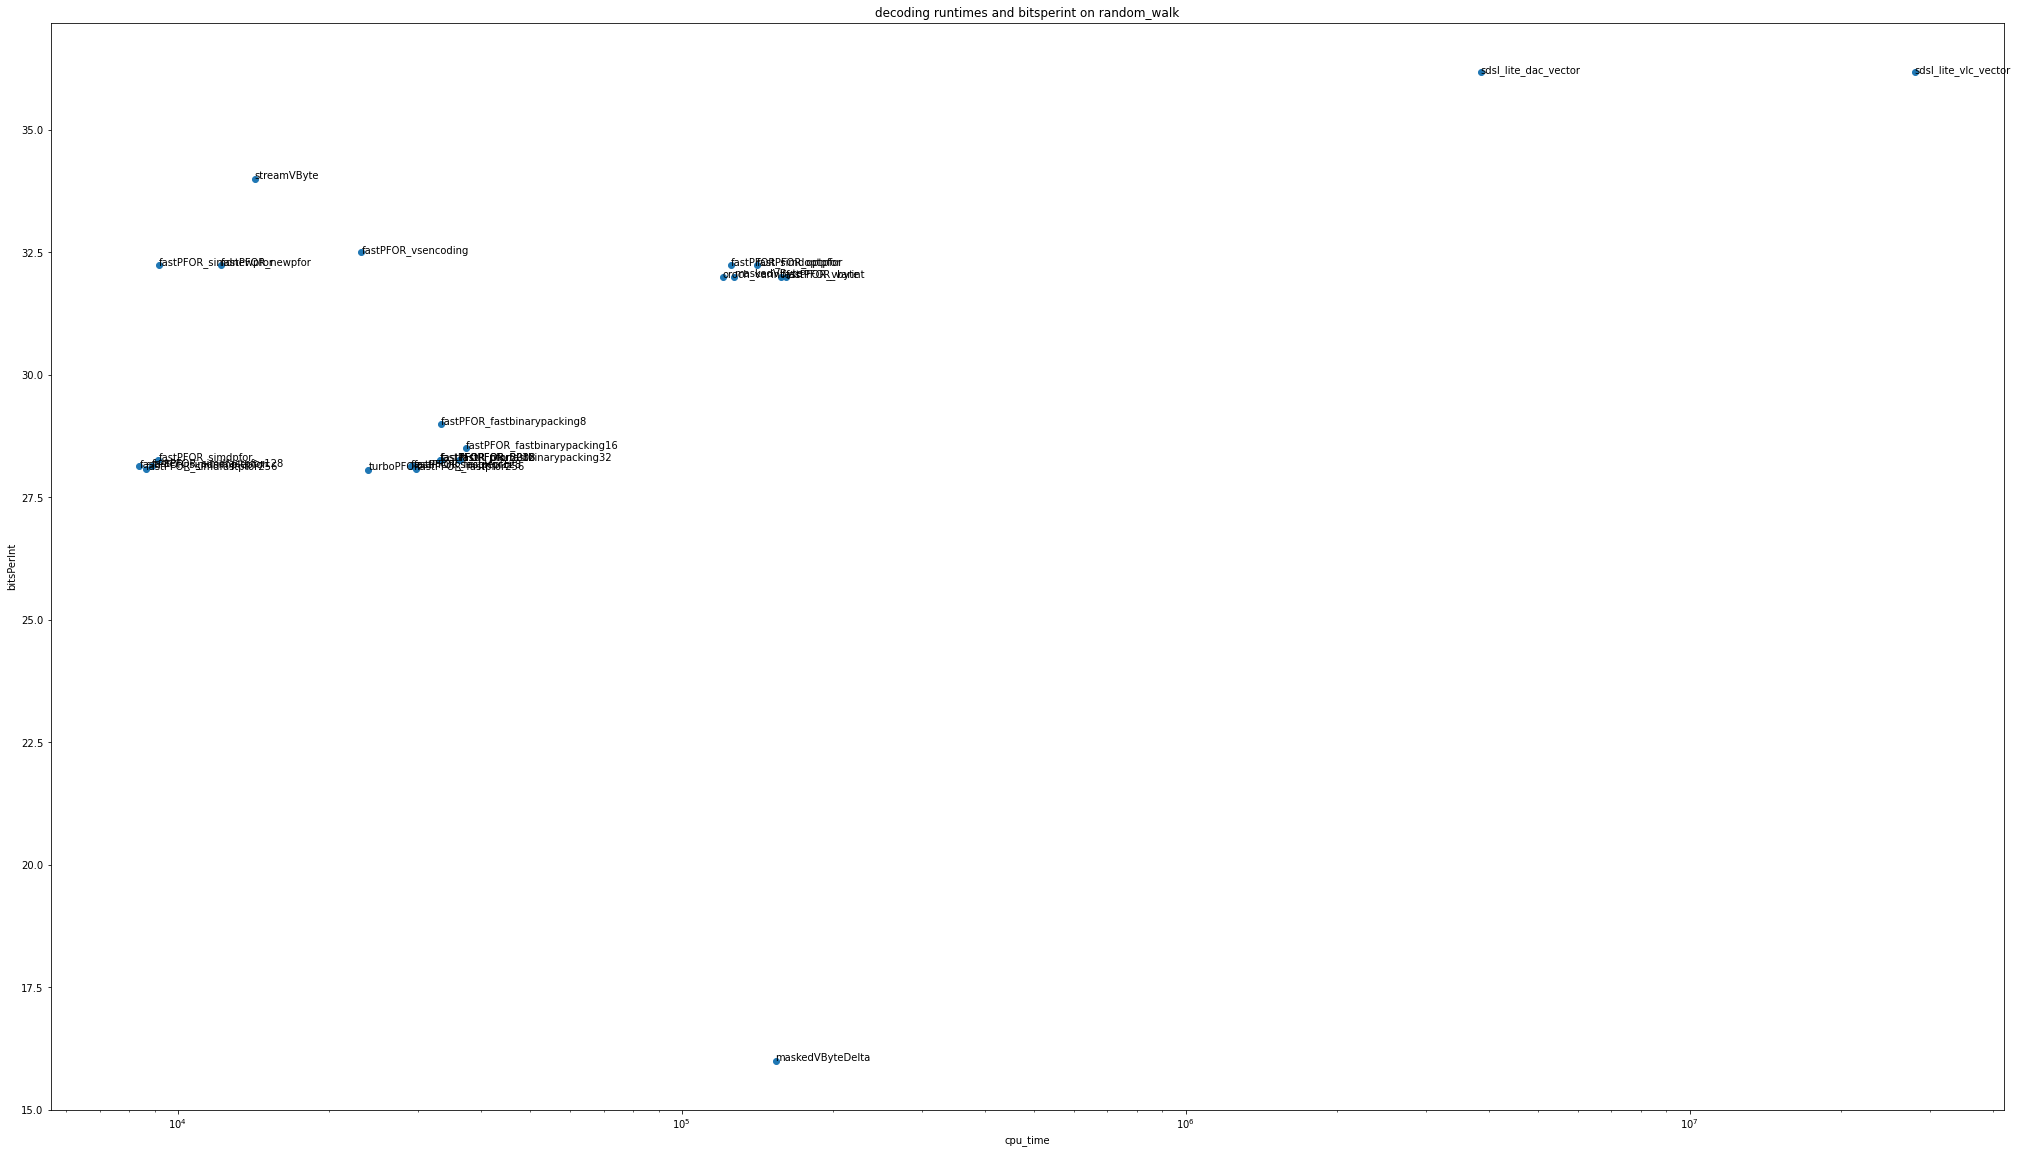

In [7]:
for input_data in ["small_numbers", "sequential_numbers", "huge_numbers", "random_walk"]:
    bpi_small_numbers = bpi[bpi["dataName"] == input_data]
    decoding_runtimes_small_numbers = decoding_runtimes[decoding_runtimes["inputdata"] == input_data]
    decoding_runtimes_small_numbers = decoding_runtimes_small_numbers.merge(bpi_small_numbers, on="codecName")
    decoding_runtimes_small_numbers
    fig = plt.figure(figsize=(35, 20))
    ax = plt.gca()
    x = list(decoding_runtimes_small_numbers["cpu_time"])
    y = list(decoding_runtimes_small_numbers["bitsPerInt"])
    ax.scatter(x, y)
    ax.set_xscale('log')
    for i, txt in enumerate(list(decoding_runtimes_small_numbers["codecName"])):
        # continue
        ax.annotate(txt, (x[i], y[i]))
    plt.xlabel("cpu_time")
    plt.ylabel("bitsPerInt")
    plt.title(f"decoding runtimes and bitsperint on {input_data}")
    plt.show()